In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.ion()

In [2]:
# generate a mixture of normals
seed = 42
np.random.seed(42)
x1 = np.random.multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]], size=(20,))
x2 = np.random.multivariate_normal(mean=[3,2], cov=[[1,0],[0,1]], size=(20,))
x = np.random.permutation(np.r_[x1, x2])
(n, p) = x.shape

In [3]:
# fit & predict kmeans for 2 clusters
K = 2
kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=100, n_init=10)
yhat = kmeans.fit_predict(x)
print('KMeans centroids:\n%s'%kmeans.cluster_centers_)

KMeans centroids:
[[ 2.77970117  2.06915154]
 [ 0.20457546 -0.04074695]]


In [5]:
''' put data + results together & compute distances '''
# allocate space
x_y_cents_dists = np.c_[x, yhat, np.zeros(shape=(n, p+1))]

# do the rest
for k in range(K):
    # fill in the centroids
    x_y_cents_dists[yhat==k, p+1:(2*p+1)] = kmeans.cluster_centers_[k,:]
    # compute euclidean distances
    x_y_cents_dists[yhat==k,-1] = np.sum((x_y_cents_dists[yhat==k, :p] - kmeans.cluster_centers_[k,:])**2, axis=1)**0.5

# show results
data = pd.DataFrame(data = x_y_cents_dists, columns=['x_%s'%(d+1) for d in range(p)] + ['cluster'] + ['cent_%s'%(d+1) for d in range(p)] + ['distance'])
display(data.head(10))

x_1       x_2  cluster    cent_1    cent_2  distance
0  2.539361  3.057122      0.0  2.779701  2.069152  1.016784
1  3.361396  3.538037      0.0  2.779701  2.069152  1.579871
2  0.808941  1.184639      1.0  0.204575 -0.040747  1.366319
3  1.774966  1.212679      0.0  2.779701  2.069152  1.320241
4  0.135297  0.677857      1.0  0.204575 -0.040747  0.721935
5 -0.405046  1.447232      1.0  0.204575 -0.040747  1.608018
6  2.927990  3.003533      0.0  2.779701  2.069152  0.946075
7  0.380255  2.821903      0.0  2.779701  2.069152  2.514752
8 -0.101923 -1.322767      1.0  0.204575 -0.040747  1.318149
9  0.319851  0.085714      1.0  0.204575 -0.040747  0.171117

In [8]:
# get the max distance per cluster
maxDists = [x_y_cents_dists[yhat==k,-1].max() for k in range(K)]
print('Maximum distances: %s'%maxDists)

Maximum distances: [2.514751761215258, 2.1714613547128705]


Text(0, 0.5, 'x_2')

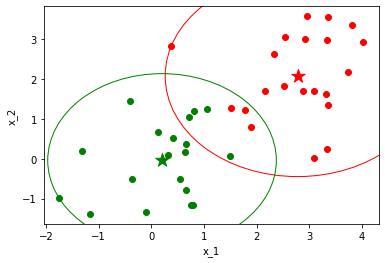

In [9]:
''' plot results '''
# add the scatters
colrs = 'rgb'
for k, col in zip(range(K), colrs):
    # add the data
    plt.scatter(x[yhat==k, 0], x[yhat==k, 1], c=col)
    # highlight the centroid
    plt.scatter(kmeans.cluster_centers_[k,0], kmeans.cluster_centers_[k,1], c=col, s=200, marker='*')
    # draw the circle
    circle = plt.Circle(kmeans.cluster_centers_[k,:], maxDists[k], color=col, fill=False, clip_on=True)
    plt.gca().add_artist(circle)
plt.xlabel('x_1')
plt.ylabel('x_2')